**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Load dataset
df = pd.read_csv("/content/heart_disease.csv")

# **01) Data Cleaning**

## **1.1 Identify Missing Values**

In [ ]:
# === Before cleaning ===
print("Total rows:", df.shape[0])
print(df['Heart Disease Status'].value_counts())
print("Null values per column:\n", df.isnull().sum())

Total rows: 10000
Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64
Null values per column:
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


## **1.2 Remove Null Values**

In [ ]:
before_rows = df.shape[0]
df = df.dropna()
after_rows = df.shape[0]

print("Total rows:", after_rows)
print(df['Heart Disease Status'].value_counts())
print(f"Removed {before_rows - after_rows} rows containing null values.")

Total rows: 7067
Heart Disease Status
No     5632
Yes    1435
Name: count, dtype: int64
Removed 2933 rows containing null values.


## **1.3 Balance Dataset**

In [ ]:
# 1.2 Balance Dataset
df_yes = df[df['Heart Disease Status'] == "Yes"]
df_no = df[df['Heart Disease Status'] == "No"]

# Match 'No' count to 'Yes' count
df_no_sampled = df_no.sample(n=len(df_yes), random_state=42)

# Combine both classes
df_balanced = pd.concat([df_yes, df_no_sampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Final balance check
print("\n=== After balancing ===")
print(df_balanced['Heart Disease Status'].value_counts())



=== After balancing ===
Heart Disease Status
Yes    1435
No     1435
Name: count, dtype: int64


## **1.4 Detecting the Duplicates**

In [ ]:
duplicated_rows_df_balanced = df_balanced[df_balanced.duplicated()]
print("Number of Duplicated Rows: ",duplicated_rows_df_balanced.shape)

Number of Duplicated Rows:  (0, 21)


In [ ]:
df_balanced.shape

(2870, 21)

In [ ]:
df_balanced.count()

,0
Age,2870
Gender,2870
Blood Pressure,2870
Cholesterol Level,2870
Exercise Habits,2870
Smoking,2870
Family Heart Disease,2870
Diabetes,2870
BMI,2870
High Blood Pressure,2870


## **1.5 Visualizing Target Class Balance Before & After Cleaning**

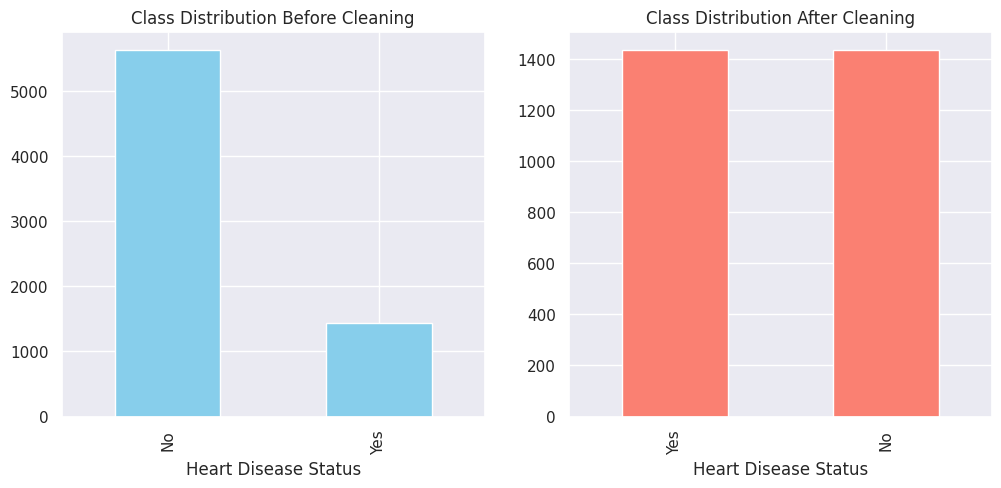

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df['Heart Disease Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution Before Cleaning")

plt.subplot(1,2,2)
df_balanced['Heart Disease Status'].value_counts().plot(kind='bar', color='salmon')
plt.title("Class Distribution After Cleaning")

plt.show()


# **2) Encoding Categorical Variables**
## **2.1 Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Binary categorical columns
binary_cols = ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
               'High Blood Pressure', 'Low HDL Cholesterol',
               'High LDL Cholesterol', 'Heart Disease Status']

label_encoder = LabelEncoder()
for col in binary_cols:
    df_balanced[col] = label_encoder.fit_transform(df_balanced[col])

## **2.2 One-Hot Encoding**

In [ ]:
# One-Hot Encoding for nominal categorical columns
multi_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level']

# Check if columns exist before attempting to one-hot encode
# This check prevents the KeyError if the cell is run multiple times
existing_multi_cols = [col for col in multi_cols if col in df_balanced.columns]

if existing_multi_cols:
    df_balanced = pd.get_dummies(df_balanced, columns=existing_multi_cols, drop_first=True)
    print(f"One-hot encoded columns: {existing_multi_cols}")
else:
    print("Specified multi_cols not found in DataFrame. They might have been encoded already.")

One-hot encoded columns: ['Exercise Habits', 'Alcohol Consumption', 'Stress Level']


In [ ]:
# Convert boolean columns to integers
bool_cols = df_balanced.select_dtypes(include='bool').columns
df_balanced[bool_cols] = df_balanced[bool_cols].astype(int)

# Check
print(df_balanced.head())
print(df_balanced.count())


    Age  Gender  Blood Pressure  Cholesterol Level  Smoking  \
0  29.0       1           152.0              213.0        0   
1  53.0       0           144.0              253.0        1   
2  37.0       1           139.0              283.0        1   
3  52.0       0           175.0              275.0        1   
4  66.0       1           132.0              240.0        0   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  23.405044                    1   
1                     1         0  21.030990                    0   
2                     1         1  27.708483                    0   
3                     0         0  37.725994                    1   
4                     0         0  25.976203                    0   

   Low HDL Cholesterol  ...  Fasting Blood Sugar  CRP Level  \
0                    1  ...                125.0   3.715720   
1                    1  ...                149.0  11.526008   
2                

In [ ]:
print(f"Original dataset shape: {df_balanced.shape}")

Original dataset shape: (2870, 24)


### **Visualizations for Encoding**

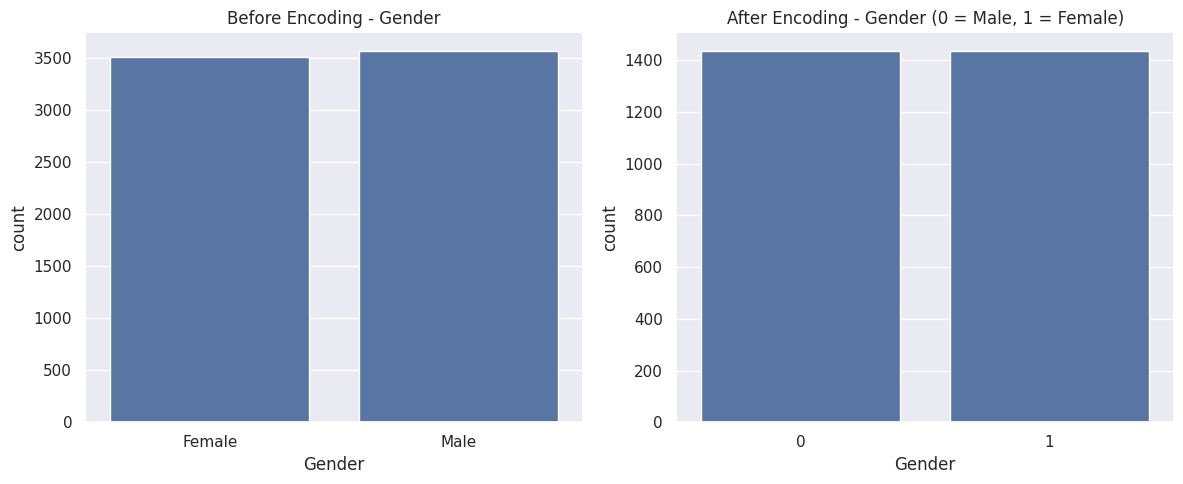

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before Encoding
sns.countplot(data=df, x='Gender', ax=axes[0])
axes[0].set_title("Before Encoding - Gender")

# After Encoding
sns.countplot(x=df_balanced['Gender'], ax=axes[1])
axes[1].set_title("After Encoding - Gender (0 = Male, 1 = Female)")

plt.tight_layout()
plt.show()


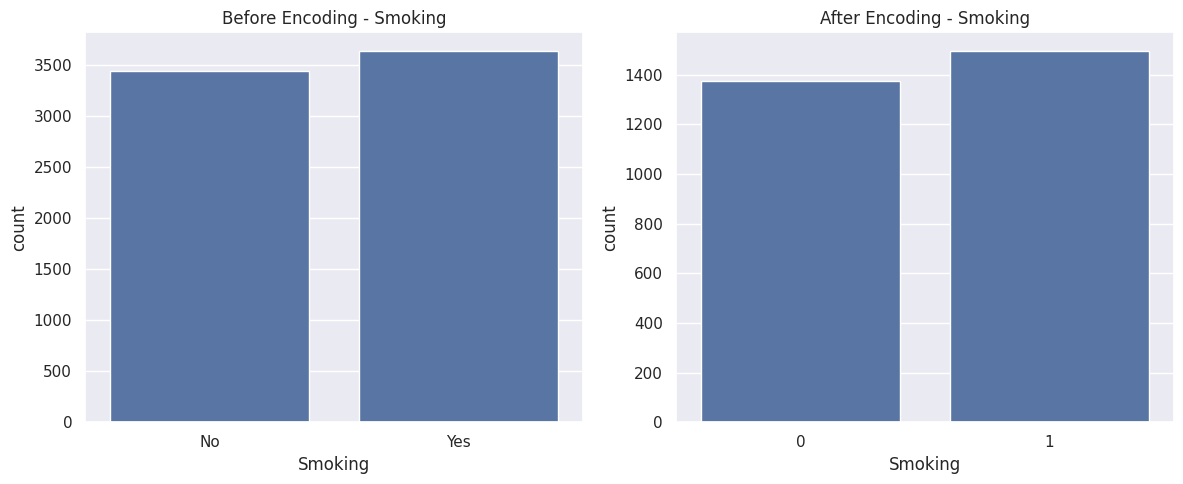

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before
sns.countplot(data=df, x='Smoking', ax=axes[0])
axes[0].set_title("Before Encoding - Smoking")

# After
sns.countplot(x=df_balanced['Smoking'], ax=axes[1])
axes[1].set_title("After Encoding - Smoking")

plt.tight_layout()
plt.show()


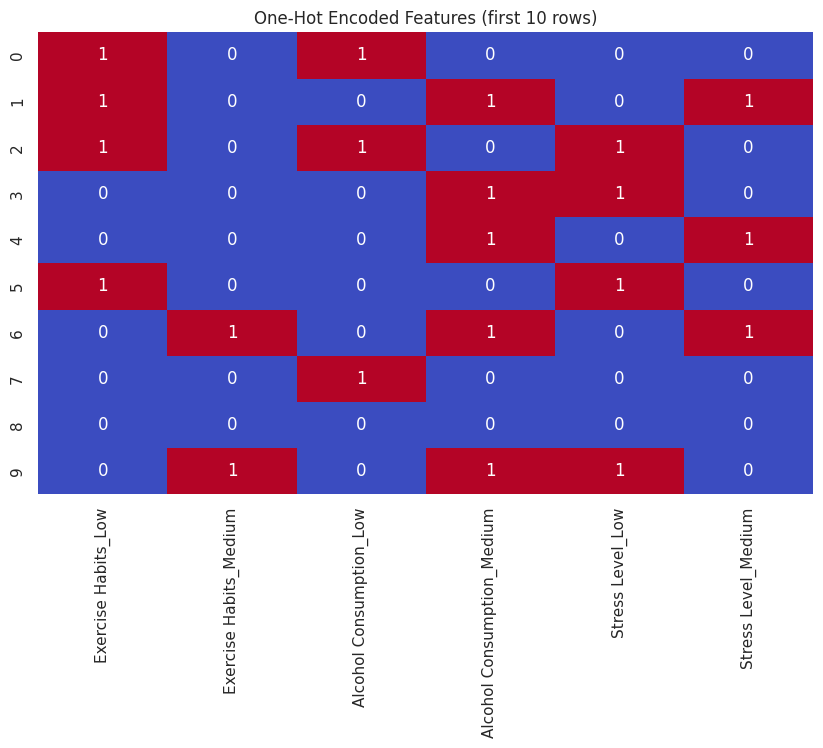

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find all new one-hot encoded columns created
encoded_cols = [col for col in df_balanced.columns if any(prefix in col for prefix in multi_cols)]

# Example: Show first 10 rows of the encoded features
plt.figure(figsize=(10,6))
sns.heatmap(df_balanced[encoded_cols].head(10), annot=True, cmap="coolwarm", cbar=False)
plt.title("One-Hot Encoded Features (first 10 rows)")
plt.show()


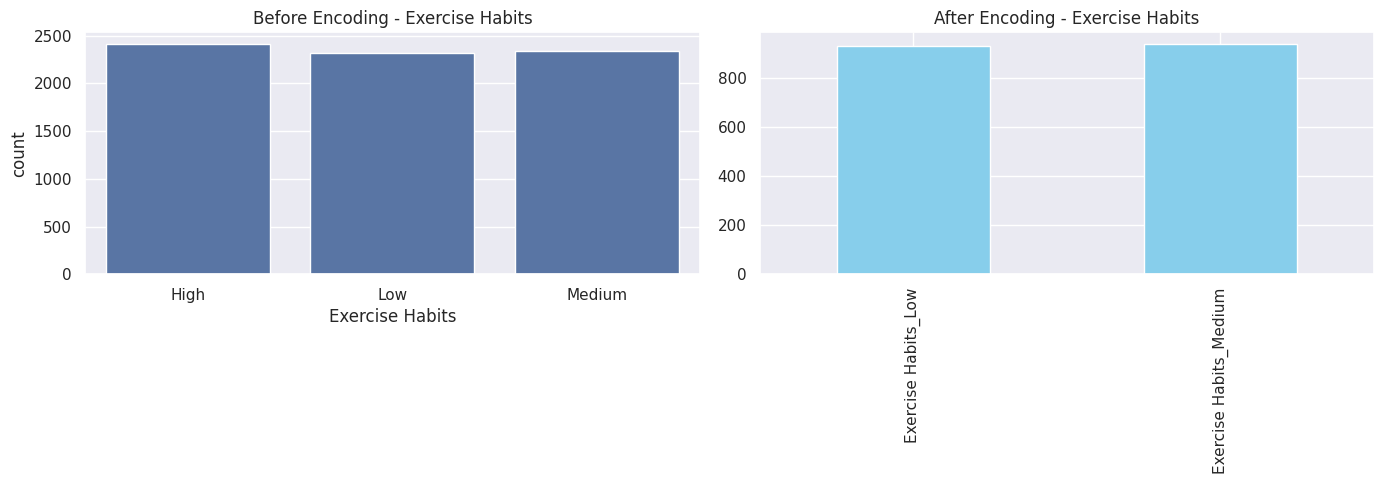

In [ ]:
# Example for Exercise Habits
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Before encoding (if you still have the original column in df)
sns.countplot(data=df, x='Exercise Habits', ax=axes[0])
axes[0].set_title("Before Encoding - Exercise Habits")

# After encoding (from df_balanced)
df_balanced.filter(like="Exercise Habits").sum().plot(kind="bar", ax=axes[1], color="skyblue")
axes[1].set_title("After Encoding - Exercise Habits")

plt.tight_layout()
plt.show()


# **3) Detecting Outliers**

### **Import Libraries**

In [ ]:
from scipy import stats
import numpy as np



## **3.1 Find Outliers**

In [ ]:
# Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)

print("Outlier rows:\n", outliers.sum())

Outlier rows:
 0


## **3.2 Z-score distributions**

In [ ]:
# Define numerical features for Z-score calculation
from scipy.stats import zscore
features = ['Age', 'Blood Pressure', 'Cholesterol Level']
df_zscore = df_balanced.copy()
for col in features:
    df_zscore[f'{col}_zscore'] = zscore(df_zscore[col])

# Threshold for Z-score
z_thresh = 3
df_zscore_filtered = df_zscore[
    (df_zscore['Age_zscore'].abs() < z_thresh) &
    (df_zscore['Blood Pressure_zscore'].abs() < z_thresh) &
    (df_zscore['Cholesterol Level_zscore'].abs() < z_thresh)
]
print(f"Original dataset shape: {df_balanced.shape}")
print(f"Filtered dataset shape (after removing outliers): {df_zscore_filtered.shape}")
print(f"Number of rows removed: {df_balanced.shape[0] - df_zscore_filtered.shape[0]}")

Original dataset shape: (2870, 21)
Filtered dataset shape (after removing outliers): (2870, 24)
Number of rows removed: 0


## **Visualize Z-score distributions with histograms**

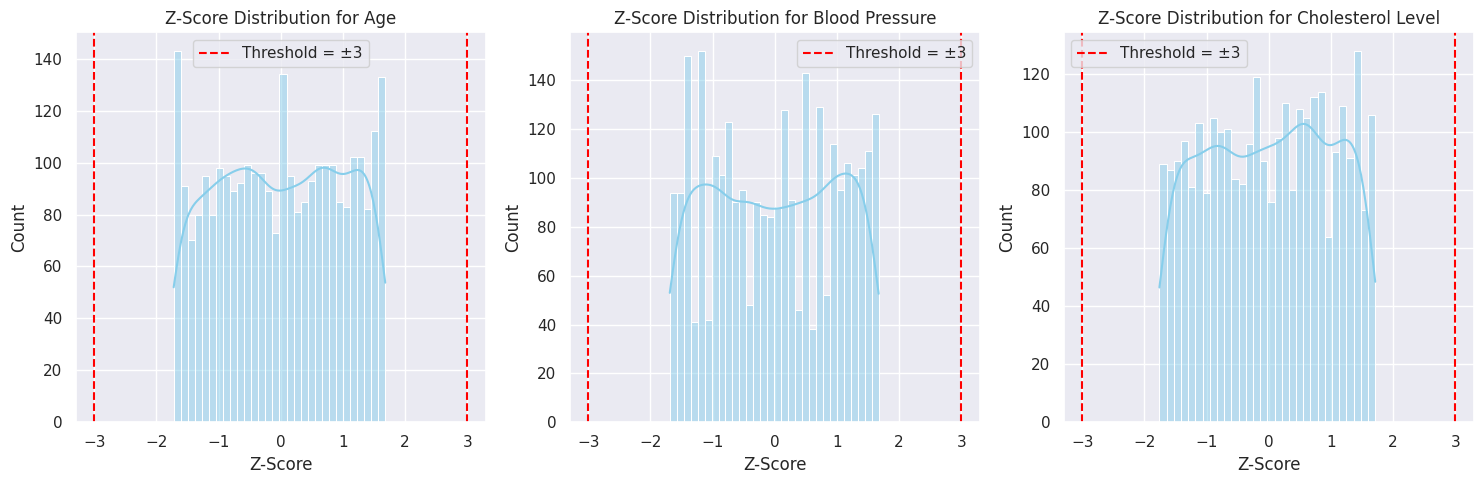

In [ ]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df_zscore, x=f'{col}_zscore', bins=30, kde=True, color='skyblue')
    plt.axvline(x=z_thresh, color='red', linestyle='--', label=f'Threshold = ±{z_thresh}')
    plt.axvline(x=-z_thresh, color='red', linestyle='--')
    plt.title(f'Z-Score Distribution for {col}')
    plt.xlabel('Z-Score')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

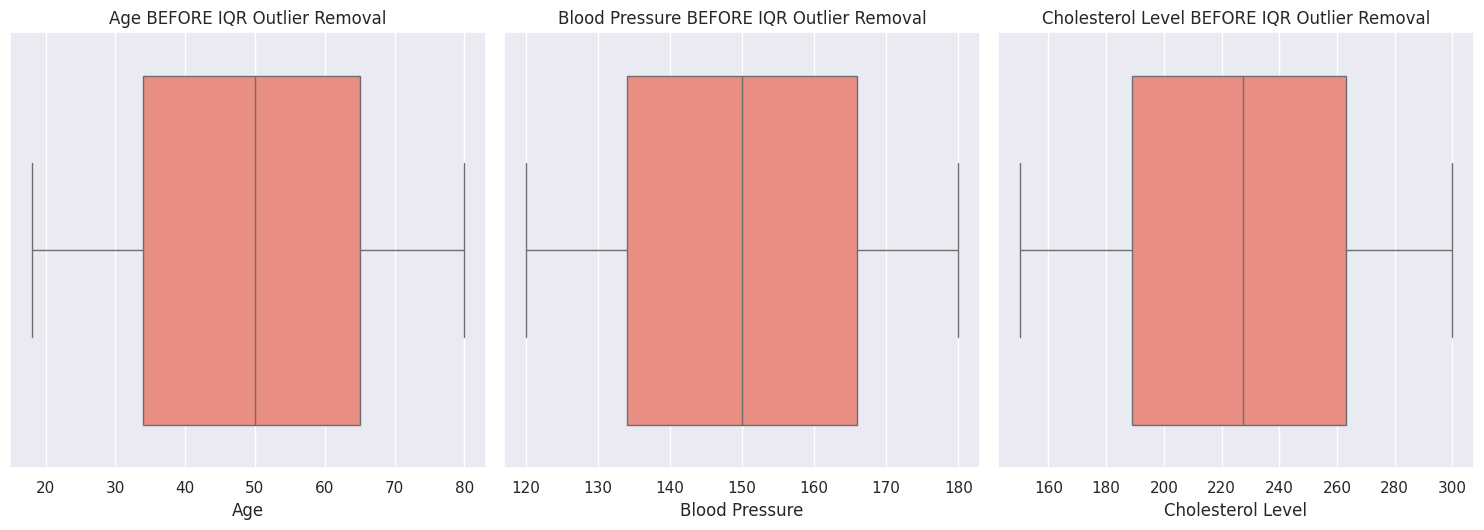

In [ ]:
plt.figure(figsize=(15, 10))

# Boxplots BEFORE Outlier Removal
plt.subplot(2, 3, 1)
sns.boxplot(x=df_balanced['Age'], color='salmon')
plt.title('Age BEFORE IQR Outlier Removal')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_balanced['Blood Pressure'], color='salmon')
plt.title('Blood Pressure BEFORE IQR Outlier Removal')

plt.subplot(2, 3, 3)
sns.boxplot(x=df_balanced['Cholesterol Level'], color='salmon')
plt.title('Cholesterol Level BEFORE IQR Outlier Removal')

plt.tight_layout()
plt.show()

In [ ]:
df_iqr = df_balanced.copy()
for col in features:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

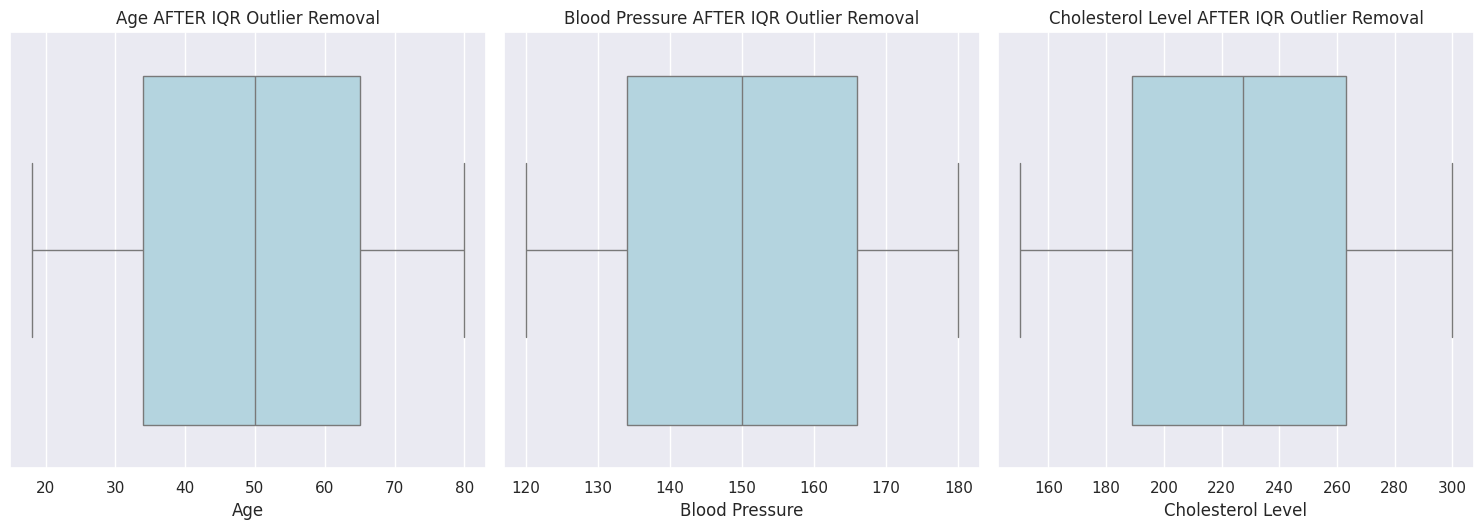

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
sns.boxplot(x=df_iqr['Age'], color='lightblue')
plt.title('Age AFTER IQR Outlier Removal')

plt.subplot(2, 3, 5)
sns.boxplot(x=df_iqr['Blood Pressure'], color='lightblue')
plt.title('Blood Pressure AFTER IQR Outlier Removal')

plt.subplot(2, 3, 6)
sns.boxplot(x=df_iqr['Cholesterol Level'], color='lightblue')
plt.title('Cholesterol Level AFTER IQR Outlier Removal')

plt.tight_layout()
plt.show()

## **4) Normalization / scaling**

In [21]:
import os
import pandas as pd

# Prefer encoded file if available, else use original
if os.path.exists("/content/encoded_dataset.csv"):
    file_path = "/content/encoded_dataset.csv"
else:
    file_path = "/content/heart_disease.csv"

# Simulate the upload message
fn = os.path.basename(file_path)
print('User uploaded file "{name}" with length {length} bytes'.format(
    name=fn, length=os.path.getsize(file_path)))

# Load the chosen file
df = pd.read_csv(file_path)
print(df.head())


User uploaded file "encoded_dataset.csv" with length 387966 bytes
    Age  Gender  Blood Pressure  Cholesterol Level  Smoking  \
0  29.0       1           152.0              213.0        0   
1  53.0       0           144.0              253.0        1   
2  37.0       1           139.0              283.0        1   
3  52.0       0           175.0              275.0        1   
4  66.0       1           132.0              240.0        0   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  23.405044                    1   
1                     1         0  21.030990                    0   
2                     1         1  27.708483                    0   
3                     0         0  37.725994                    1   
4                     0         0  25.976203                    0   

   Low HDL Cholesterol  ...  Fasting Blood Sugar  CRP Level  \
0                    1  ...                125.0   3.715720   
1             

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume 'df' is your original DataFrame loaded from the CSV
# df = pd.read_csv('Encoding_dataset.csv')

# --- Step 1: Encode the categorical columns ---
# Use pandas.get_dummies() to automatically find and convert columns with text
df_encoded = pd.get_dummies(df)

print("## Data after One-Hot Encoding (first 5 rows) ##")
print(df_encoded.head())
print("\nDataFrame columns after encoding:")
print(df_encoded.columns)


# --- Step 2: Now, apply the scaler to the fully numerical DataFrame ---
scaler = StandardScaler()

# Fit and transform the encoded data
df_scaled_encoded = scaler.fit_transform(df_encoded)

# Convert back to a DataFrame to view it easily
df_scaled_encoded = pd.DataFrame(df_scaled_encoded, columns=df_encoded.columns)

print("\n" + "="*50 + "\n")
print("## Data after both Encoding and Scaling (first 5 rows) ##")
print(df_scaled_encoded.head())

## Data after One-Hot Encoding (first 5 rows) ##
    Age  Gender  Blood Pressure  Cholesterol Level  Smoking  \
0  29.0       1           152.0              213.0        0   
1  53.0       0           144.0              253.0        1   
2  37.0       1           139.0              283.0        1   
3  52.0       0           175.0              275.0        1   
4  66.0       1           132.0              240.0        0   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  23.405044                    1   
1                     1         0  21.030990                    0   
2                     1         1  27.708483                    0   
3                     0         0  37.725994                    1   
4                     0         0  25.976203                    0   

   Low HDL Cholesterol  ...  Heart Disease Status  Exercise Habits_Low  \
0                    1  ...                     1                    1   
1        

## Histograms Before Scaling ##


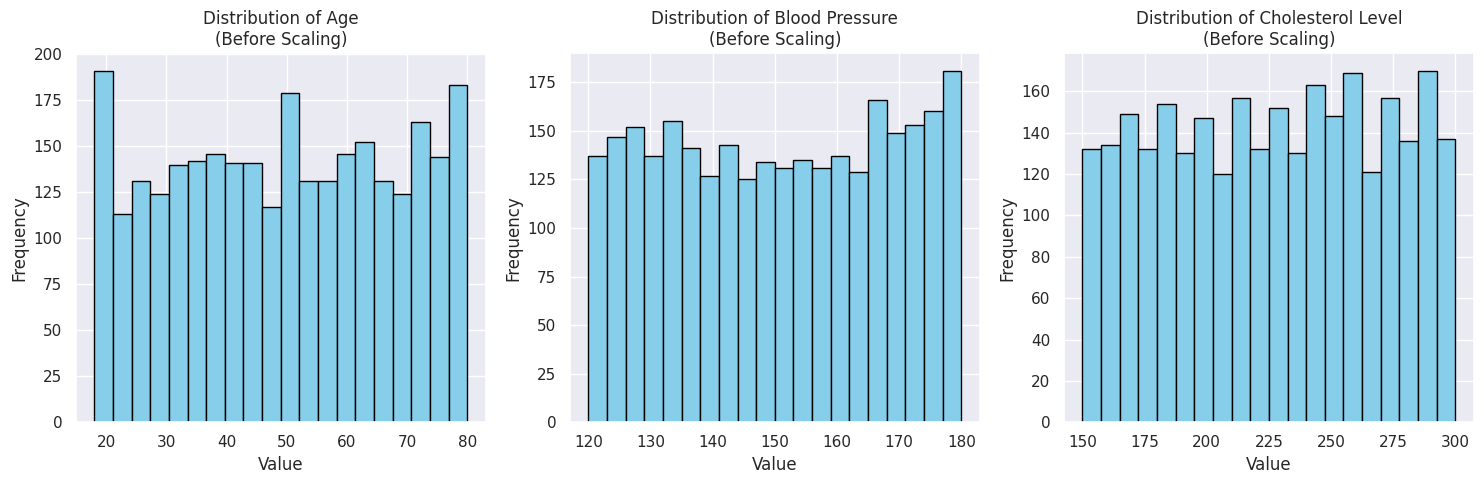


## Histograms After Scaling ##


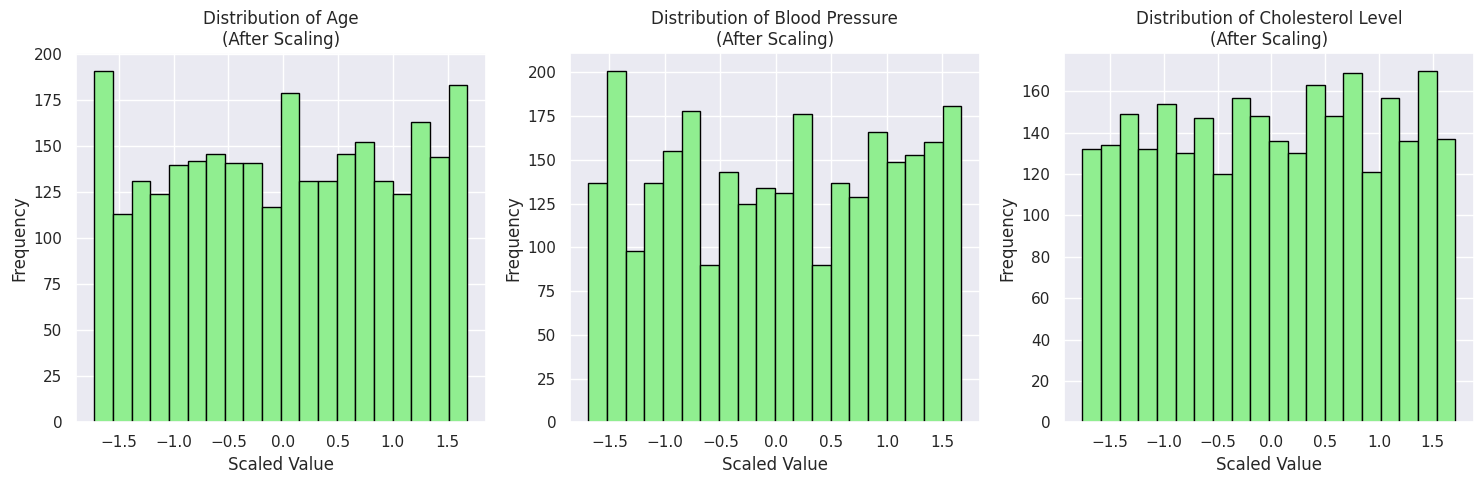

In [24]:

# --- Step 2: Scale the Data ---

# Initialize the scaler
scaler = StandardScaler()

# Create the scaled DataFrame
df_scaled_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)


# --- Step 3: Visualize with Histograms ---

# Select a few interesting numerical columns to visualize
columns_to_plot = ['Age', 'Blood Pressure', 'Cholesterol Level']

# Plotting histograms BEFORE scaling
print("## Histograms Before Scaling ##")
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    plt.hist(df_encoded[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}\n(Before Scaling)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show() # Use plt.show() to display the plot inline


# Plotting histograms AFTER scaling
print("\n## Histograms After Scaling ##")
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    plt.hist(df_scaled_encoded[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}\n(After Scaling)')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show() # Use plt.show() to display the plot inline

# **5) Feature** **Engineering**

## **5.1 Feature Creation**

In [25]:
heart_df = df.groupby('Age').agg({
    'Blood Pressure': 'mean',
    'Cholesterol Level': 'mean',
    'BMI': 'mean',
    'Heart Disease Status': 'count'
}).reset_index()

# Aggregate patient data by Age to create age-level features:
# - Average blood pressure
# - Average cholesterol level
# - Average BMI
# - Count of patients (with heart disease status recorded)

In [26]:
heart_df = df_balanced.groupby('Age').agg({
    'Blood Pressure': 'mean',
    'Cholesterol Level': 'mean',
    'BMI': 'mean',
    'Heart Disease Status': 'count'
}).reset_index()

# Add composite risk score (example: average of Blood Pressure, Cholesterol Level, and BMI)
heart_df['CompositeRiskScore'] = (heart_df['Blood Pressure'] + heart_df['Cholesterol Level'] + heart_df['BMI']) / 3
print(heart_df.head())

    Age  Blood Pressure  Cholesterol Level        BMI  Heart Disease Status  \
0  18.0      153.980000         230.480000  28.323318                    50   
1  19.0      150.740000         223.260000  28.319386                    50   
2  20.0      148.767442         228.581395  29.611322                    43   
3  21.0      153.375000         226.083333  29.133938                    48   
4  22.0      150.558140         225.976744  28.494748                    43   

   CompositeRiskScore  
0          137.594439  
1          134.106462  
2          135.653386  
3          136.197424  
4          135.009877  


### **5.2 Recency, Frequency, Monetary (RFM) Features**

In [27]:
# No date column in the heart disease dataset, so no datetime conversion needed

# Example: Health metrics calculation
health_metrics = df.groupby('Age').agg({
    'Age': lambda x: (df['Age'].max() - x.max()),
    'Gender': 'count',
    'Blood Pressure': lambda x: (x * df.loc[x.index, 'Cholesterol Level']).mean()
})
health_metrics.columns = ['AgeRecency', 'PatientCount', 'AvgBPCholProduct']

## **5.3 Clustering-Ready Features**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
health_metrics_scaled = scaler.fit_transform(health_metrics)

# Normalize health metrics features using StandardScaler:
#  Scales AgeRecency, PatientCount, and AvgBPCholProduct values to have mean = 0 and standard deviation = 1
#  Helps improve performance of machine learning models by removing bias from feature scale differences

## **5.4 EDA Visualization**

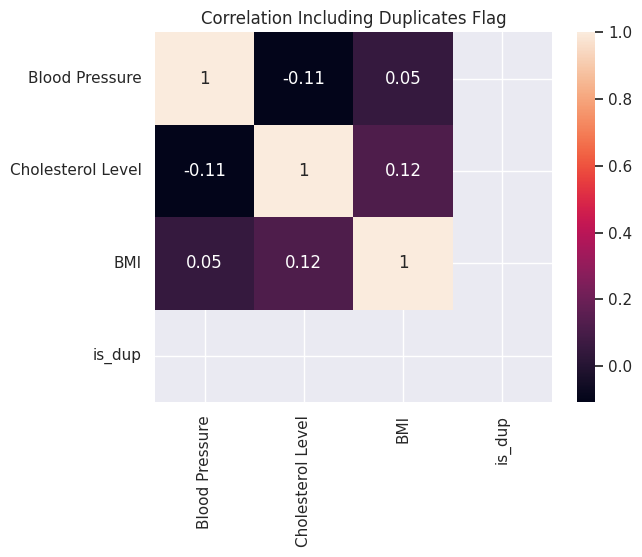

In [29]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Duplicate heatmap (simplified) - Comment: Flag duplicates per row
df['is_dup'] = df.duplicated(keep=False)
sns.heatmap(df[['Blood Pressure', 'Cholesterol Level', 'BMI', 'is_dup']].head(100).corr(), annot=True)
plt.title('Correlation Including Duplicates Flag')
plt.show()